<a href="https://colab.research.google.com/github/sselvaduzcan/image_watermark/blob/master/Hastal%C4%B1k_Tahmini_Makine_%C3%96%C4%9Frenmesi_Proje_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
X = X.copy()

In [ ]:
y = y.copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
# y'yi sadece 0 ve 1 olarak kodlayacağız

y = (y != 0).astype(int)


In [ ]:
y.value_counts(dropna=False)

,count
num,
0,164
1,139


In [ ]:
X.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
X.thal.value_counts(dropna=False)

,count
thal,
3.0,166
7.0,117
6.0,18
NaN,2


In [ ]:
X[X.isnull().any(axis=1)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


In [ ]:
X = X.dropna()
y= y.loc[X.index]


In [ ]:
y.value_counts(dropna=False)

,count
num,
0,160
1,137


In [ ]:
# Veri tipi dönüştürülmesi

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
X[categorical_cols] = X[categorical_cols].astype('category')



<ipython-input-90-b3a7e6b59814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = X[categorical_cols].astype('category')


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


<Axes: >

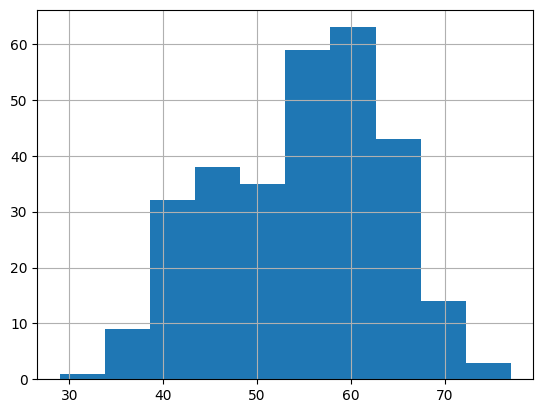

In [ ]:
X.age.hist()

In [ ]:
X.age.min()

29

In [ ]:
X.age.max()

77

Yaş gruplama

In [ ]:
bins = [29, 39, 49, 59, 69, 77]
labels = ['30-39', '40-49', '50-59', '60-69', '70-77']
X.loc[:, 'age_group'] = pd.cut(X['age'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
X.age_group.value_counts(dropna=False)

,count
age_group,
50-59,121
60-69,81
40-49,71
30-39,14
70-77,10


<Axes: >

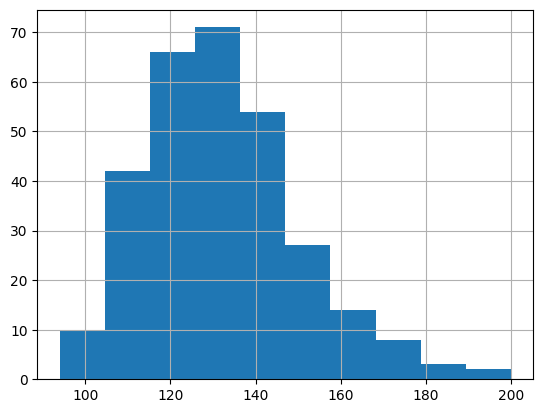

In [ ]:
X.trestbps.hist()

In [ ]:
bins = [0, 89, 120, 139, X['trestbps'].max()]
labels = ['Low', 'Normal', 'High-Normal', 'High']

X.loc[:, 'trestbps_group'] = pd.cut(X['trestbps'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
X.trestbps_group.value_counts(dropna=False)

,count
trestbps_group,
High-Normal,102
High,98
Normal,97
Low,0


In [ ]:
bins = [90, 120, 139, X['trestbps'].max()]
labels = ['Normal', 'High-Normal', 'High']

X.loc[:, 'trestbps_group'] = pd.cut(X['trestbps'], bins=bins, labels=labels, include_lowest=True)


<ipython-input-100-f1c3ae87fe78>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['High', 'High', 'Normal', 'High-Normal', 'High-Normal', ..., 'High', 'Normal', 'High', 'High-Normal', 'High-Normal']
Length: 297
Categories (3, object): ['Normal' < 'High-Normal' < 'High']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.loc[:, 'trestbps_group'] = pd.cut(X['trestbps'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
X.trestbps_group.value_counts(dropna=False)

,count
trestbps_group,
High-Normal,102
High,98
Normal,97


<Axes: >

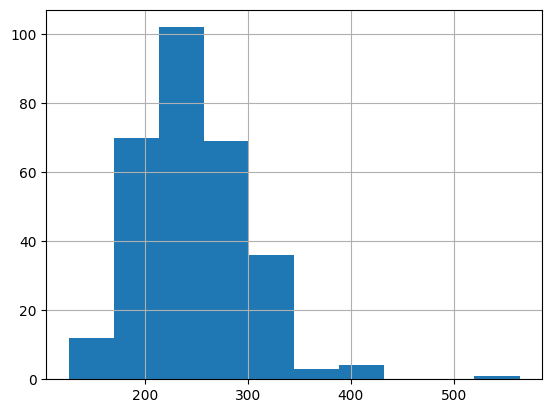

In [ ]:
X.chol.hist()

In [ ]:
X.chol.min()

126

In [ ]:
X.chol.max()

564

Kolesterol değerlerini gruplama

In [ ]:
bins = [0, 200, 239, X['chol'].max()]
labels = ['Normal', 'Borderline', 'High']
X.loc[:, 'chol_group'] = pd.cut(X['chol'], bins=bins, labels=labels)
X.chol_group

,chol_group
0,Borderline
1,High
2,Borderline
3,High
4,Borderline
...,...
297,High
298,High
299,Normal
300,Normal


In [ ]:
X.fbs.value_counts(dropna=False)

,count
fbs,
0,254
1,43


In [ ]:
X.restecg.value_counts(dropna=False)

,count
restecg,
0,147
2,146
1,4


<Axes: >

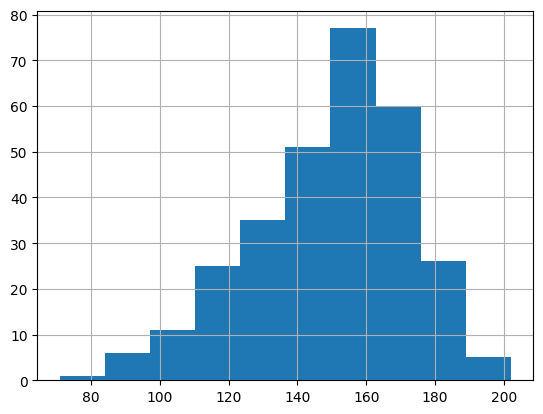

In [ ]:
X.thalach.hist()


Thalach verisinin kategorize edilmesi

In [ ]:
target = 220 - X['age']
X.loc[:, 'thalach_pct'] = X['thalach'] / target

conditions = [
    X['thalach_pct'] < 0.70,
    (X['thalach_pct'] >= 0.70) & (X['thalach_pct'] <= 0.85),
    X['thalach_pct'] > 0.85
]

labels = ['Low', 'Normal', 'High']

X.loc[:, 'hr_level'] = np.select(conditions, labels, default='Unknown')


In [ ]:
X.hr_level.value_counts(dropna=False)

,count
hr_level,
High,207
Normal,63
Low,27


<Axes: >

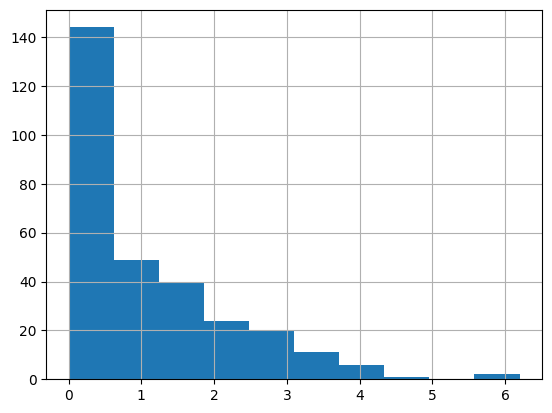

In [ ]:
X.oldpeak.hist()

In [ ]:
X.oldpeak.describe()

,oldpeak
count,297.000000
mean,1.055556
std,1.166123
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000


In [ ]:
X.loc[X['oldpeak'] > 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group,trestbps_group,chol_group,thalach_pct,hr_level
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,60-69,High,Normal,0.917722,High
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,50-59,High,Borderline,0.672727,Low
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,50-59,High,High,0.900621,High
191,51,1,4,140,298,0,0,122,1,4.2,2,3.0,7.0,50-59,High,High,0.721893,Normal
285,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,50-59,Normal,High,0.864198,High


olpeak verisinin kategorize edilmesi

In [ ]:
X['oldpeak_group'] = pd.cut(X['oldpeak'],
                            bins=[-1, 1, 2, 4, X['oldpeak'].max()],
                            labels=['Low', 'Moderate', 'High', 'Very High'])


In [ ]:
X.oldpeak_group.value_counts()

,count
oldpeak_group,
Low,174
Moderate,73
High,45
Very High,5


In [ ]:
X.ca.value_counts()

,count
ca,
0.0,174
1.0,65
2.0,38
3.0,20


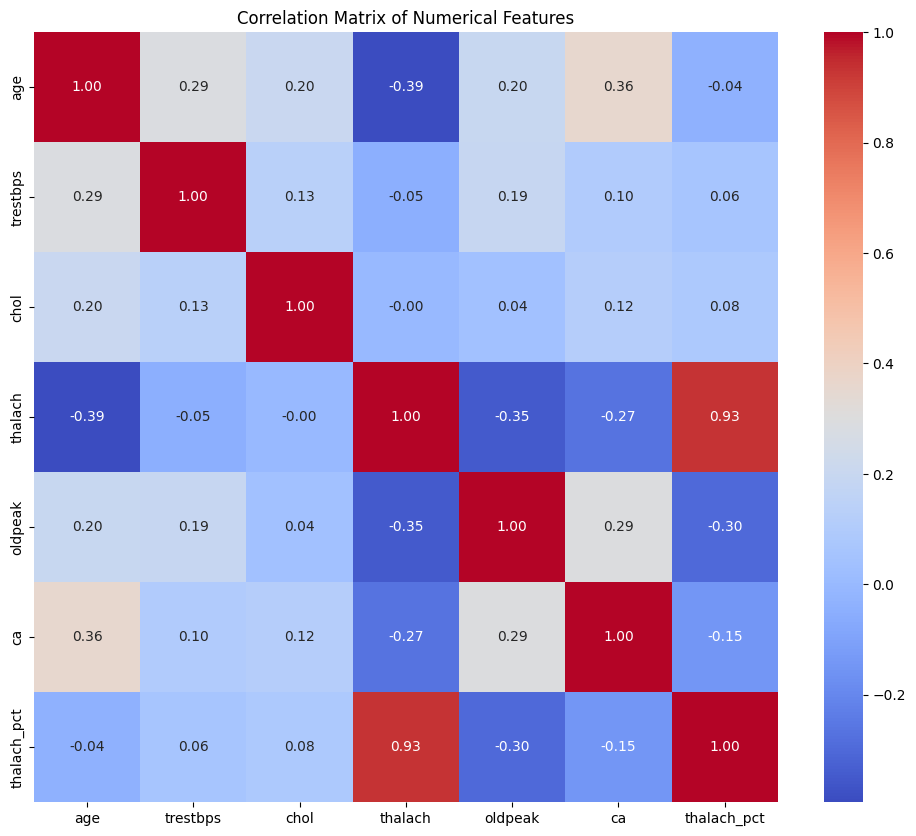

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


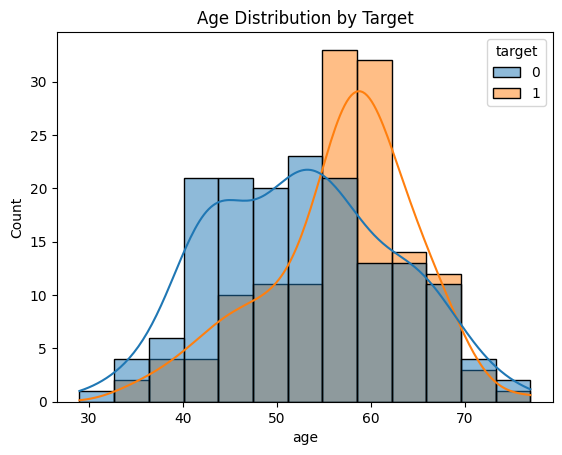

In [ ]:
X_temp = X.copy()
X_temp['target'] = y


sns.histplot(data=X_temp, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()


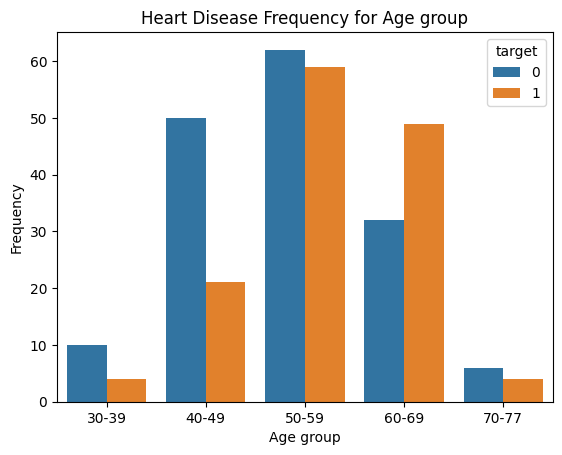

In [ ]:
sns.countplot(data=X_temp, x='age_group', hue='target')
plt.title('Heart Disease Frequency for Age group')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.show()

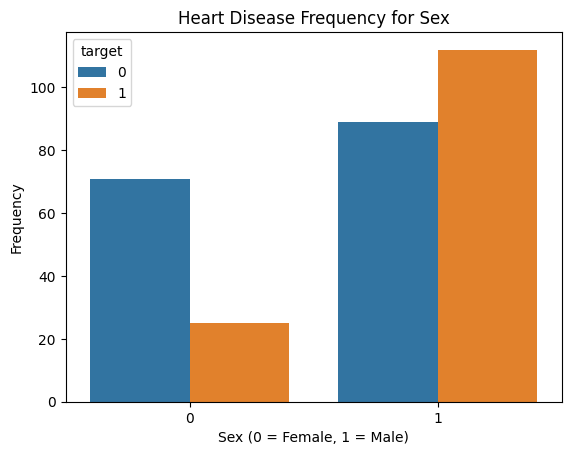

In [ ]:
sns.countplot(data=X_temp, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

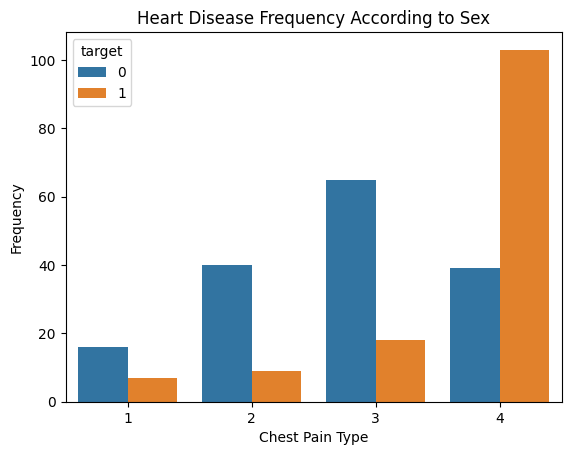

In [ ]:
sns.countplot(data=X_temp, x='cp', hue='target')
plt.title('Heart Disease Frequency According to Sex')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X_temp.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_group',
       'trestbps_group', 'chol_group', 'thalach_pct', 'hr_level',
       'oldpeak_group', 'target'],
      dtype='object')

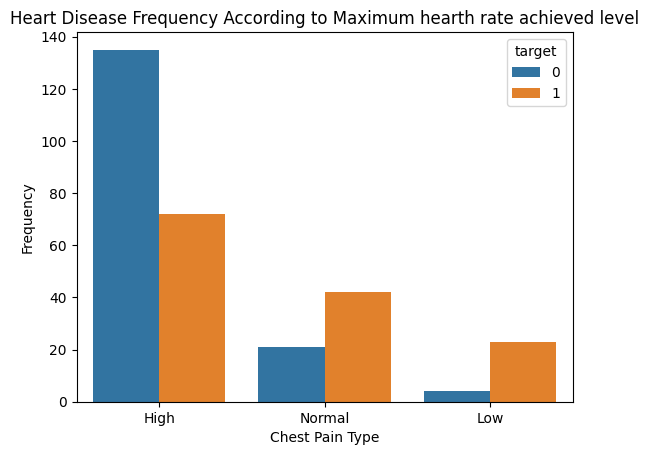

In [ ]:
sns.countplot(data=X_temp, x='hr_level', hue='target')
plt.title('Heart Disease Frequency According to Maximum hearth rate achieved level')
plt.xlabel('hr_level')
plt.ylabel('Frequency')
plt.show()

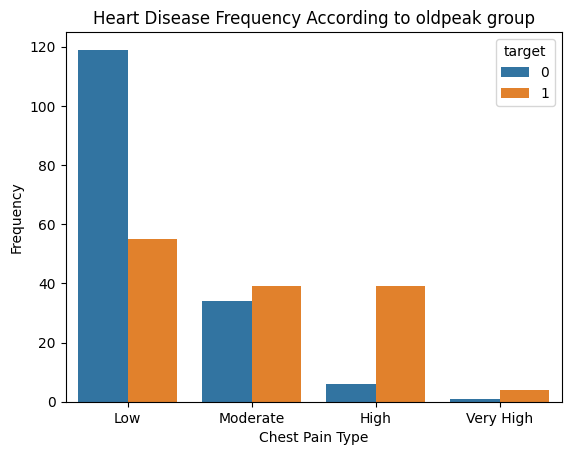

In [ ]:
sns.countplot(data=X_temp, x='oldpeak_group', hue='target')
plt.title('Heart Disease Frequency According to oldpeak group')
plt.xlabel('Oldpeak group')
plt.ylabel('Frequency')
plt.show()

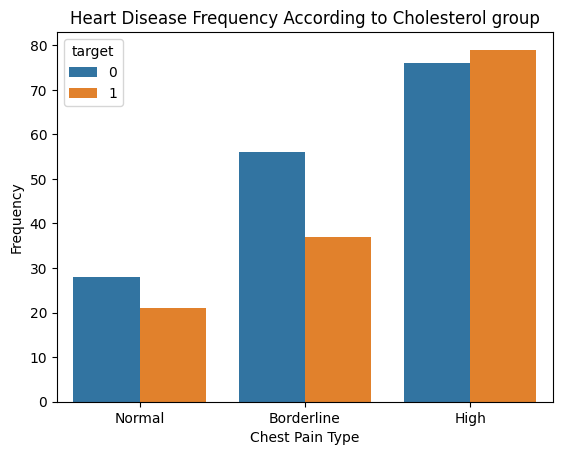

In [ ]:
sns.countplot(data=X_temp, x='chol_group', hue='target')
plt.title('Heart Disease Frequency According to Cholesterol group')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

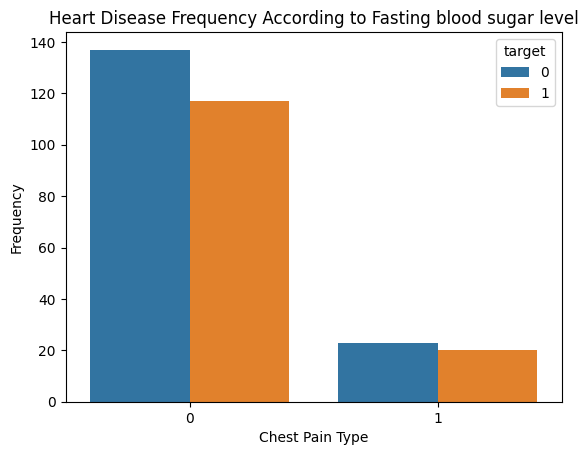

In [ ]:
sns.countplot(data=X_temp, x='fbs', hue='target')
plt.title('Heart Disease Frequency According to Fasting blood sugar level')
plt.xlabel('Blood sugar')
plt.ylabel('Frequency')
plt.show()

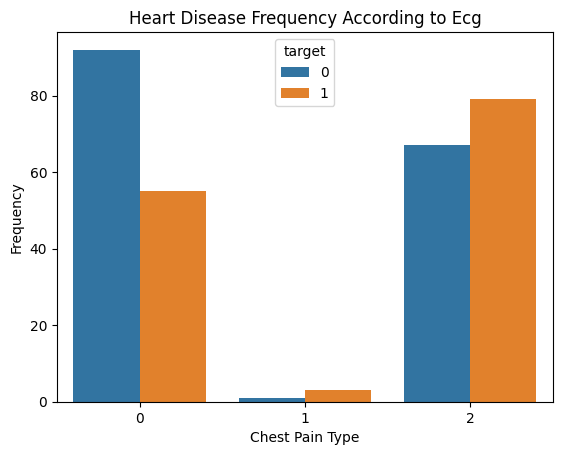

In [ ]:
sns.countplot(data=X_temp, x='restecg', hue='target')
plt.title('Heart Disease Frequency According to Ecg')
plt.xlabel('Ecg')
plt.ylabel('Frequency')
plt.show()

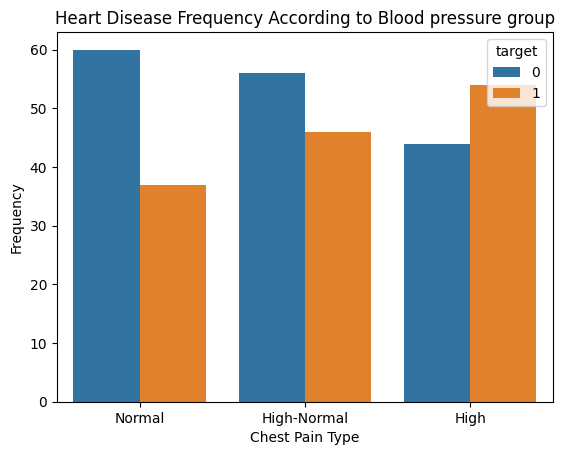

In [ ]:
sns.countplot(data=X_temp, x='trestbps_group', hue='target')
plt.title('Heart Disease Frequency According to Blood pressure group')
plt.xlabel('Blood pressure level')
plt.ylabel('Frequency')
plt.show()

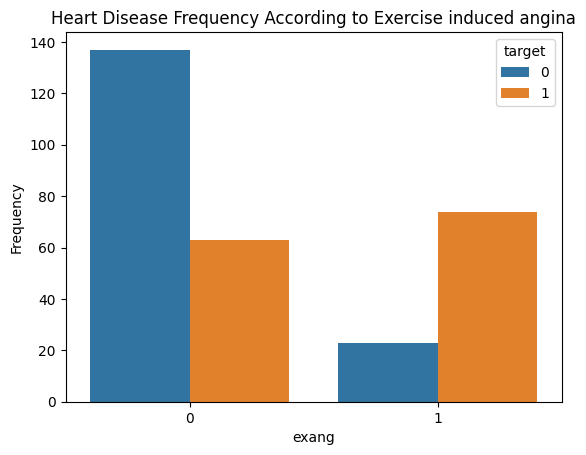

In [ ]:
sns.countplot(data=X_temp, x='exang', hue='target')
plt.title('Heart Disease Frequency According to Exercise induced angina')
plt.xlabel('exang')
plt.ylabel('Frequency')
plt.show()

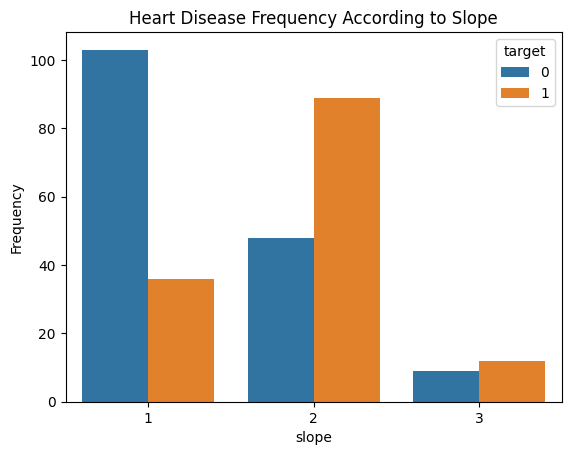

In [ ]:
sns.countplot(data=X_temp, x='slope', hue='target')
plt.title('Heart Disease Frequency According to Slope')
plt.xlabel('slope')
plt.ylabel('Frequency')
plt.show()

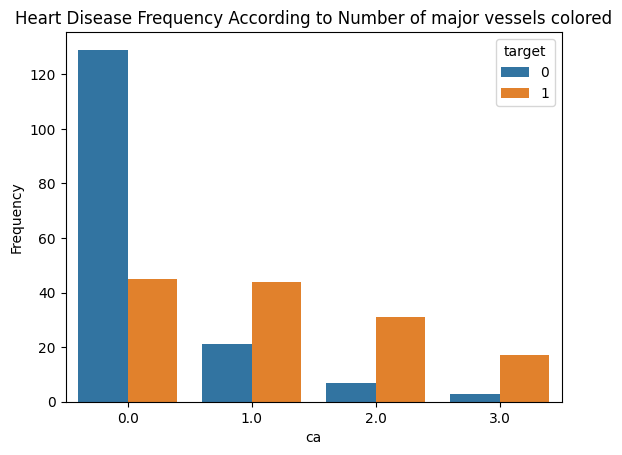

In [ ]:
sns.countplot(data=X_temp, x='ca', hue='target')
plt.title('Heart Disease Frequency According to Number of major vessels colored')
plt.xlabel('ca')
plt.ylabel('Frequency')
plt.show()

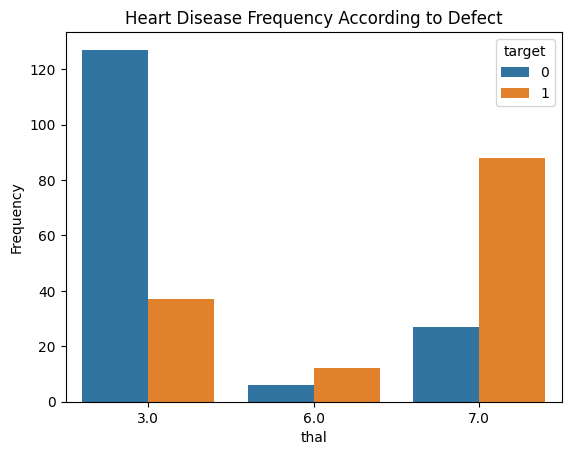

In [ ]:
sns.countplot(data=X_temp, x='thal', hue='target')
plt.title('Heart Disease Frequency According to Defect')
plt.xlabel('thal')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             297 non-null    int64   
 1   sex             297 non-null    category
 2   cp              297 non-null    category
 3   trestbps        297 non-null    int64   
 4   chol            297 non-null    int64   
 5   fbs             297 non-null    category
 6   restecg         297 non-null    category
 7   thalach         297 non-null    int64   
 8   exang           297 non-null    category
 9   oldpeak         297 non-null    float64 
 10  slope           297 non-null    category
 11  ca              297 non-null    float64 
 12  thal            297 non-null    category
 13  age_group       297 non-null    category
 14  trestbps_group  297 non-null    category
 15  chol_group      297 non-null    category
 16  thalach_pct     297 non-null    float64 
 17  hr_level        297 n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve



#Model için kullanılacakların seçilmesi
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'hr_level', 'chol_group', 'trestbps_group', 'ca']
numerical_features = ['age', 'oldpeak']




# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Create preprocessing pipelines for numerical and categorical features
# Numerical pipeline: Scale features
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline: One-hot encode features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' is safer for unseen categories in test set
])

# Combine pipelines using ColumnTransformer
# Apply num_pipeline to numerical features
# Apply cat_pipeline to categorical features needing one-hot encoding
# Passthrough binary features ('sex', 'fbs', 'exang') or include them if preferred
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('passthrough', 'passthrough', ['sex', 'fbs', 'exang']) # Keep binary features as they are
    ],
    remainder='drop' # Drop any columns not specified (shouldn't be any here)
)

# Apply the preprocessing pipeline to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the *fitted* preprocessing pipeline to the testing data
X_test_processed = preprocessor.transform(X_test)

# Get feature names after transformation (useful for some models like Tree-based ones)
feature_names_out = preprocessor.get_feature_names_out()
print(f"\nProcessed feature names ({X_train_processed.shape[1]} features):\n{feature_names_out}")

print(f"\nProcessed Training set shape: {X_train_processed.shape}")
print(f"Processed Test set shape: {X_test_processed.shape}")

Training set shape: (237, 19)
Test set shape: (60, 19)

Processed feature names (37 features):
['num__age' 'num__oldpeak' 'cat__sex_0' 'cat__sex_1' 'cat__cp_1'
 'cat__cp_2' 'cat__cp_3' 'cat__cp_4' 'cat__fbs_0' 'cat__fbs_1'
 'cat__restecg_0' 'cat__restecg_1' 'cat__restecg_2' 'cat__exang_0'
 'cat__exang_1' 'cat__slope_1' 'cat__slope_2' 'cat__slope_3'
 'cat__thal_3.0' 'cat__thal_6.0' 'cat__thal_7.0' 'cat__hr_level_High'
 'cat__hr_level_Low' 'cat__hr_level_Normal' 'cat__chol_group_Borderline'
 'cat__chol_group_High' 'cat__chol_group_Normal'
 'cat__trestbps_group_High' 'cat__trestbps_group_High-Normal'
 'cat__trestbps_group_Normal' 'cat__ca_0.0' 'cat__ca_1.0' 'cat__ca_2.0'
 'cat__ca_3.0' 'passthrough__sex' 'passthrough__fbs' 'passthrough__exang']

Processed Training set shape: (237, 37)
Processed Test set shape: (60, 37)


--- Training Logistic Regression ---

--- Results for Logistic Regression ---
Training Accuracy: 0.8819
Test Accuracy: 0.8333
Test ROC AUC: 0.9364
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Test Confusion Matrix:
 [[29  3]
 [ 7 21]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


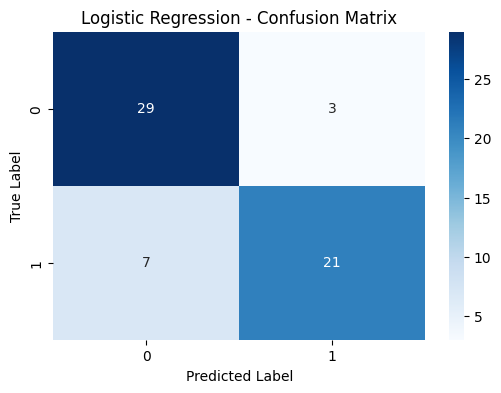

------------------------------
--- Training Random Forest ---


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Results for Random Forest ---
Training Accuracy: 1.0000
Test Accuracy: 0.8500
Test ROC AUC: 0.9381
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Test Confusion Matrix:
 [[28  4]
 [ 5 23]]


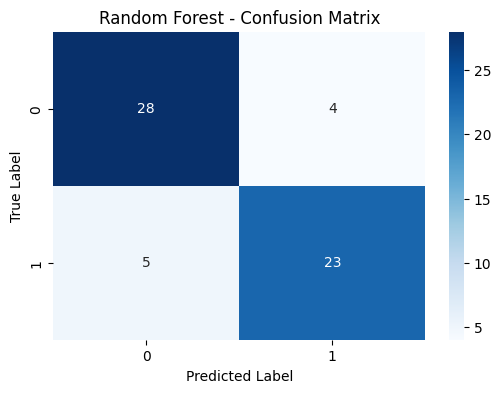

------------------------------
--- Training Support Vector Machine ---

--- Results for Support Vector Machine ---
Training Accuracy: 0.9283
Test Accuracy: 0.8333
Test ROC AUC: 0.9542
Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

Test Confusion Matrix:
 [[30  2]
 [ 8 20]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


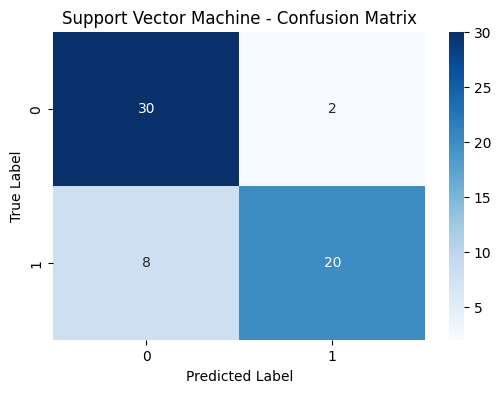

------------------------------


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for ROC AUC
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model
    model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    y_prob_test = model.predict_proba(X_test_processed)[:, 1] # Probabilities for ROC AUC

    # Evaluate the model
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_prob_test)

    # Store results
    results[name] = {
        "model": model,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "classification_report": report_test,
        "confusion_matrix": cm_test,
        "roc_auc": roc_auc,
        "y_pred": y_pred_test,
        "y_prob": y_prob_test
    }

    # Print results
    print(f"\n--- Results for {name} ---")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print("Test Classification Report:\n", report_test)
    print("Test Confusion Matrix:\n", cm_test)
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 30)



--- Model Comparison ---
                    Model  Test Accuracy  Test ROC AUC
2  Support Vector Machine       0.833333      0.954241
1           Random Forest       0.850000      0.938058
0     Logistic Regression       0.833333      0.936384


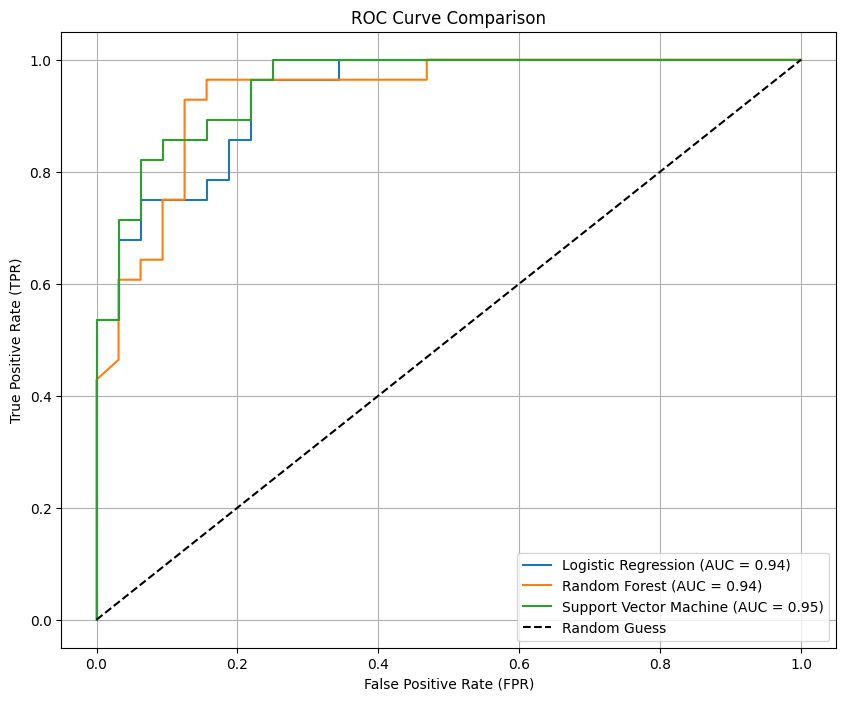

In [ ]:
# Display comparison summary
print("\n--- Model Comparison ---")
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        "Model": name,
        "Test Accuracy": result['accuracy_test'],
        "Test ROC AUC": result['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by='Test ROC AUC', ascending=False))

# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # Dashed line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Örnek: preprocessing pipeline + model birleştirme
clf_pipeline = Pipeline([
    ('preprocessing', preprocessor),  # az önce bahsettiğimiz num/cat pipeline'ı içeren preprocessor
    ('classifier', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # C: regularization strength (düşük = daha fazla regularization)
    'classifier__penalty': ['l1', 'l2']  # L1 = Lasso, L2 = Ridge
}

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Test set üzerinde performans
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best cross-validated score: 0.8476063829787235
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
